In [116]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code
import seaborn as sns
import pandas as pd
np.random.seed(1234)


A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a 
Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions 
concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?


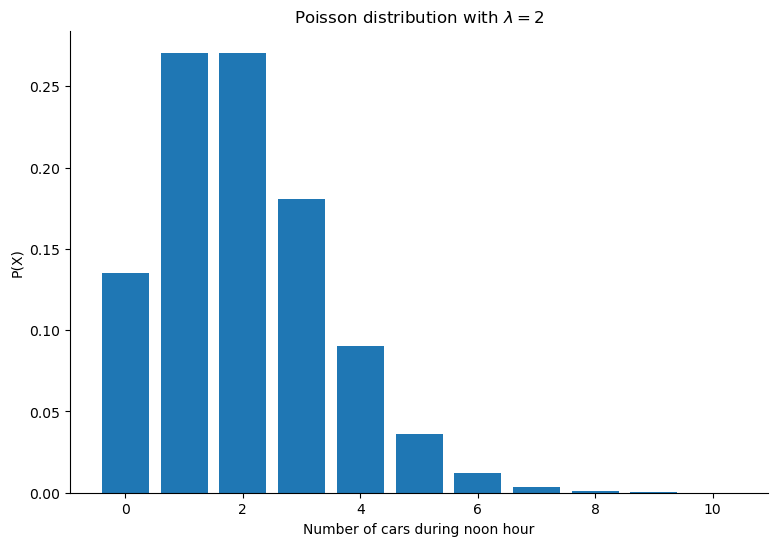

In [118]:
λ= 2

x = np.arange(0,11)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $λ = 2$')
plt.xlabel('Number of cars during noon hour')
plt.ylabel('P(X)');


In [54]:
cars = stats.poisson(2).pmf(0)

cars

0.1353352832366127

In [60]:
stats.poisson(2).sf(2)

0.32332358381693654

In [61]:
stats.poisson(2).sf(0)

0.8646647167633873

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?


In [65]:
μ = 3
σ = .3

gpa = stats.norm(μ, σ)

top_5_percent_cutoff = gpa.ppf(.95)

top_5_percent_cutoff


3.4934560880854417

In [67]:
bottom_15_percent_cutoff = gpa.ppf(.15)
bottom_15_percent_cutoff

2.689069983151863

In [75]:
range_of_gpas = gpa.ppf([0.2,0.3])
range_of_gpas

array([2.74751363, 2.84267985])

In [73]:
over_35 = gpa.cdf(3.5)
over_35

0.9522096477271853

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [119]:
n = 4326
p = .02

stats.binom(n, p).sf(96)



0.13975823631416445

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?


In [85]:
n = 60
p = 0.01

stats.binom(n, p).sf(0)

0.45284335760923855

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?


In [121]:
n = round(0.9 * 3 * 22)
p = 0.03

stats.binom(n, p).sf(0)

0.8342199288437352

In [123]:
stats.binom(n * 2, p).pmf(0)

0.027483031992576134

In [99]:
stats.binom(n * 5, p).pmf(0)

0.00012521651388091245

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [120]:

μ = 15 * 2
σ = 3 * 2


# Max time I can be in line without getting late to class = 60 - 15 -10 - 2 = 33 mins

stats.norm(μ, σ).cdf(33)


0.6914624612740131

 Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [6]:
from env import host, username, password
import os

# create the url variable (string) with my username, password and host inserted
url = f'mysql+pymysql://{username}:{password}@{host}/employees'

In [7]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    '''
    return a formatted string containing username, password, 
    host and database for connecting to the mySQL server
    and the database indicated.
    enc_file checks to see if the env.py exists in cwd
    '''
    if env_file:
        username, password, host = (env.username, env.password, env.host)
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else:
        return 'hello, you need a username and password to get in!'
    
url = get_db_url('employees')

In [104]:
#df = pd.read_sql(query, url)

In [36]:
query = '''
SELECT *
FROM departments
    join dept_emp de
        using (dept_no)
    join salaries s
        using (emp_no)
WHERE de.to_date > now()
    AND s.to_date > now()
'''

In [102]:
employees_df = pd.read_sql(query, url)
employees_df.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [70]:
μ = 72012.235857
σ = 17309.995380

salaries = stats.norm(μ, σ)

sixtyk_salary = salaries.cdf(60000)
sixtyk_salary

0.2438574248045388

In [74]:
μ = 72012.235857
σ = 17309.995380

salaries = stats.norm(μ, σ)

ninetyfive_salary = salaries.sf(95000)
ninetyfive_salary

0.09208819199191742

In [73]:
μ = 72012.235857
σ = 17309.995380

salaries = stats.norm(μ, σ)

top5_salary = salaries.ppf(.95)
top5_salary

100484.64454030624

In [111]:
range_of_salary1 = salaries.sf(65000)
range_of_salary1

0.6572970780449968

In [127]:
range_of_salary2 = salaries.sf(80000)
range_of_salary2

0.322236509495911

In [129]:
range_of_salary1 - range_of_salary2

0.33506056854908584